<a href="https://colab.research.google.com/github/anonymax25/tensorflow-jupyter-exo/blob/master/04_classification_avec_les_reseaux_de_neurones_dans_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification avec les réseaux de neurones dans TensorFlow

Ce notebook est une introduction à la classification avec les réseaux de neurones dans TensorFlow.

La [classification supervisée](https://fr.wikipedia.org/wiki/Classement_automatique) consiste à prédire si une observation donnée est de telle classe ou telle autre classe.

Par exemple, vous pourriez vouloir prédire :
- si quelqu'un est atteint de maladie cardiaque ou non, en fonction de ses paramètres de santé. C'est ce que l'on appelle la classification binaire puisque que nous avons que 2 options
- si une photo représente de la nourriture, une personne ou un chien. C'est ce que l'on appelle la classification multi-classes, étant donné que l'on a plus de 2 options
- quelles catégories doivent être assignées à une page Wikipedia. C'est ce que l'on appelle la classification multi-étiquettes, chaque page pouvant avoir une ou plusieurs catégories assignées.

Dans ce notebook, nous allons travailler sur différents problèmes de classification avec TensorFlow, c'est-à-dire prendre les données d'entrée pour chaque problème et prédire à quelle classe ces données correspondent.

## 1. Architecture d'un réseau de neurones pour un problème de classification

L'arichitecture d'un réseau de neurones pour la classification peut varier grandement en fonction du problème traité.

Cependant, il y a quelques éléments fondamentaux que tous les réseaux de neurones contiennent :
- la couche d'entrée (*input layer*)
- les couches cachées (*hidden layers*)
- la couche de sortie (*output layer*)

Ici, voici une architecture d'un réseau de neurones, avec quelques valeurs standards qui sont souvent utilisées pour les problèmes de classification :


| **Hyperparamètre** | **Classification binaire** | **Classification multi-classes** |
| --- | --- | --- |
| Input layer shape | Même forme que le nombre de variables (par exemple 5 pour âge, sexe, taille, poids, status fumeur dans une prédiction pour maladie cardiaque) | Idem classification binaire |
| Hidden layer(s) | Spécifique au problème, minimum = 1, maximum = illimité  | Idem classification binaire |
| Neurons per hidden layer | Spécifique au problème, généralement de 10 à 100 | Idem classification binaire |
| Output layer shape | 1 (une classe ou l'autre) | 1 par classe (par exemple 3 pour nourriture, personne ou chien) |
| Hidden activation | Généralement [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Idem classification binaire |
| Output activation | [Sigmoide](https://fr.wikipedia.org/wiki/Sigmo%C3%AFde_(math%C3%A9matiques)) | [Softmax](https://fr.wikipedia.org/wiki/Fonction_softmax) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) dans TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) dans TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Idem classification binaire |

## 2. Visualisation des données

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


Nous allons commencer par créer un jeu de données binaire, en utilisant la fonction `make_circles()` du module Scikit-Learn :

In [2]:
from sklearn.datasets import make_circles

# Nous allons créer un jeu de 1000 exemples
n_samples = 1000

# La fonction make_circles permet de créer des points formant 2 cercles concentriques
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# les 10 premières étquettes
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Les `DataFrame` de `pandas` sont assez pratiques et souvent utilisés.

Nous allons en créer un à partir de nos données, en utilisant la fonction `DataFrame()` de `pandas` :

In [ ]:
import pandas as pd

# X est composé de 2 variables que nous allons appeler X0 et X1 (correspondant à nos 2 types de cercles) et la variable à expliquer y que nous allons appeler label
cercles = 

# affichage des premières lignes (5 premières lignes par exemple)
cercles.

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
import pandas as pd

# X est composé de 2 variables que nous allons appeler X0 et X1 (correspondant à nos 2 types de cercles) et la variable à expliquer y que nous allons appeler label
cercles = pd.DataFrame({'X0': X[:,0],'X1': X[:,1],'label':y})

# affichage des premières lignes (5 premières lignes par exemple)
cercles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


Voyons comment sont réparties les données par rapport à l'étiquette, en utilisant la méthode `value_counts()` :

In [ ]:
cercles.

0    500
1    500
Name: label, dtype: int64

In [12]:
cercles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

Nous avons donc un problème de classification binaire ici : il n'y a que 2 valeurs possibles pour l'étiquette (0 ou 1).

La visualisation des données peut être très utile lorsque cela est possible, comme dans notre cas.

Nous n'allons donc pas nous en priver !

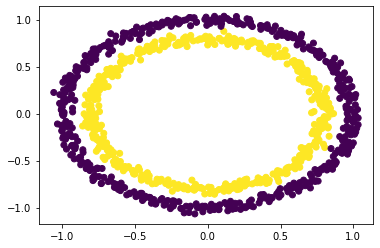

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

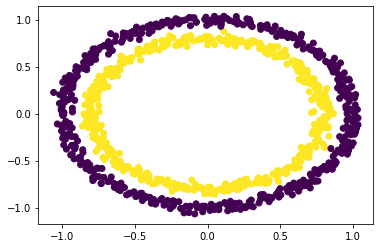

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

On peut maintenant comprendre que notre objectif ici est d'être capable de distinguer les points jaunes des points foncés.

## 3. Forme des données d'entrée (*inputs)* et de sortie (*outputs*)

Regardons les formes de nos données X et y :

In [ ]:
 ,

((1000, 2), (1000,))

In [14]:
X.shape, y.shape

((1000, 2), (1000,))

Logique, puisque nous avons bien 1000 observations séparées en 2 classes, ainsi que l'étiquette réelle correspondant à la classe (0 ou 1) pour chaque observation.

Par exemple, aficchons les donénes correspondant à la première observation :

In [ ]:
 , 

(array([0.75424625, 0.23148074]), 1)

In [16]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Notre réseau de neurones pour ce problème de classification binaire devra donc :
- accepter en entrée un tenseur avec au moins une de ses dimensions égale à 2 (les variables explicatives X0 et X1)
- fournir en sortie un tenseur avec au moins une de ses dimensions égale à 1 (la classe prédite par le modèle)

Place à la modélisation.

## 4. Modélisation

Comme avec la régression, nous aurons les 3 étapes typiques pour créer et entraîner un modèle :
1. **Créer un modèle** : assembler les couches d'un réseau de neurones soi-même (à l'aide de l'API [fonctionnelle Keras](https://www.tensorflow.org/guide/keras/functional) ou [séquentielle Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) ou importer un modèle déjà construit précédemment

2. **Compiler un modèle** : définir comment les performances du modèle devraient se mesurer (fonction coût/métrique) et comment les optimiser (optimizer)

3. **Entraîner un modèle** : laisser le modèle essayer de trouver les tendances (*patterns*) dans les données

Pour construire notre modèle pour notre problème de classification, nous allons utiliser l'API séquentielle Keras : elle est disponible directement à partir du module `keras` de TensorFlow.

Crééons notre premier modèle et entraînons-le à partir de nos données (création/compilation/entraînement) :

Epoch 1/5
32/32 [==============================] - 0s 547us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 500us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 438us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 437us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 438us/step - loss: 0.6942 - accuracy: 0.4820


In [27]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
# une seule couche dense comportant 1 neurone
modele_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compilation du modèle
# fonction coût : entropie croisée binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : SGD
# metrique de performance : l'exactitude (accuracy)
modele_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])


# 3. Entraînement du modèle sur 5 époques
modele_1.fit(X, y, epochs=5, verbose=1)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6099 - mae: 0.6099
Epoch 2/5
32/32 [==============================] - 0s 924us/step - loss: 0.5324 - mae: 0.5324
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.5033 - mae: 0.5033
Epoch 4/5
32/32 [==============================] - 0s 948us/step - loss: 0.5004 - mae: 0.5004
Epoch 5/5
32/32 [==============================] - 0s 905us/step - loss: 0.5004 - mae: 0.5004


En regardant l'exactitude (*accuracy* en anglais), nous voyons que notre modèle donne de très mauvais résultats (moins de 50% d'exactitude).

Et si l'on entraîne le même modèle plus longtemps (par exemple sur 200 époques) ?

In [ ]:
# verbose=0 permet de ne pas afficher les informations pendant l'entraînement sur chaque époque
modele_1.

In [30]:
modele_1.fit(X, y, epochs=200, verbose=0)

Evaluons le modèle ré-entraîné avec la méthode `evaluate()` :

32/32 [==============================] - 0s 875us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Même après 200 étapes d'entraîenemtn, le modèle est toujours aussi mauvais.

Essayons d'ajouter une couche et et d'entraîner ce nouveau modèle sur 100 époques :

In [33]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
# 2 couches denses comportant 1 neurone chacune
modele_2 = tf.keras.Sequential([tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)])

# 2. Compilation du modèle
# fonction coût : entropie croisée binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : SGD
# metrique de performance : l'exactitude (accuracy)
modele_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])


# 3. Entraînement du modèle sur 100 époques
modele_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluation du modèle à l'aide de la méthode evaluate()
modele_2.evaluate()

32/32 [==============================] - 0s 753us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

In [37]:
modele_2.evaluate(X, y)

32/32 [==============================] - 0s 958us/step - loss: 0.5001 - mae: 0.5001


[0.5001184940338135, 0.5001184940338135]

Nous restons bloqués à 50% d'exactitude.

Essayons cette fois un modèle avec 3 couches denses de respectivement 100, 10 et 1 neurones et en utilisant l'optimiseur Adam (au lieu du SGD jusqu'à préent), toujours avec un entraînement sur 100 époques :

In [38]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
# 3 couches denses comportant respectivement 100, 10 et 1 neurones
modele_3 = tf.keras.Sequential([tf.keras.layers.Dense(100), tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])

# 2. Compilation du modèle
# fonction coût : entropie croisée binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

# 3. Entraînement du modèle sur 100 époques
modele_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluation du modèle à l'aide de la méthode evaluate()
modele_3.

32/32 [==============================] - 0s 559us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

Le résultat est encore une fois toujours aussi mauvais !

Nous allons visualiser les prédictions de notre modèle pour tenter de voir ce qu'il se passe.

Pour ce faire, nous allons créer la fonction `plot_frontiere_decision()` qui permet de tracer la frontière de décision d'un modèle :

In [39]:
import numpy as np

def plot_frontiere_decision(model, X, y):
  """
  Trace la frontière de décision créée par un modèle ayant faire des prédictions à partir de X.
  Cette fonction a été adaptée à partir des ces deux sources majeures :
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Essayons maintenant cette fonction sur notre modèle `modele_3` pour vérifier visuellement les prédictions que fait notre modèle :

doing binary classifcation...


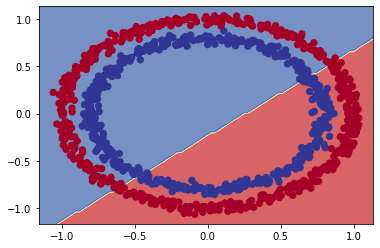

doing binary classifcation...


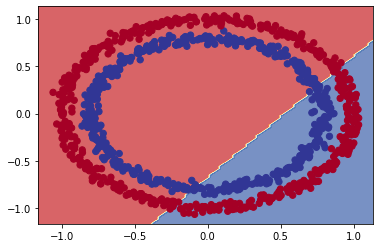

In [40]:
plot_frontiere_decision(modele_3, X, y)

Il semblerait que notre modèle essaie de séparer linéairement nos données, ce qui explique pourquoi les résultats sont si mauvais.

## 5. La pièce manquante : la non-linéarité

Avant d'aller plus loin, vous pouvez essayer d'expérimenter différents réseaux de neurones sur ce très bon site [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true).

Il permet d'avoir un aperçu visuel de l'entraînement d'un réseau de neurones (ici, le lien donné est configuré pour correspondre à notre cas de figure, c'est-à-dire à un jeu de données formant 2 cercles concentriques).

Une fois l'expérimentation faite, nous allons maintenant créer un nouveau modèle et ajouter un nouveau paramètre lors de la création du modèle, le paramètre `activation`.

Commençons par créer un modèle avec 2 couches :
- une première couche dense d'1 neurone en spéficiant la fonction d'activation linéaire disponible dans le module `activations` de `Keras`
- une deuxième couche dense (la couche de sortie) comportant 1 neurone, sans spécifier le paramètre de la fonction activation

Pour la compilation, nous pouvons garder l'optimiseur Adam ; on spécifiera le paramètre lr à `0.001`, lr étant le taux d'apprentissage (*learning rate*).

Nous sauvegardons ensuite l'entraînement (sur 100 époques) pour la visualisation des résultats :

In [55]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
modele_4 = tf.keras.Sequential([tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)])

# 2. Compilation du modèle
# fonction coût : entropie croisée binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_4.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

# 3. Entraînement du modèle sur 100 époques
historique = modele_4.fit(X, y, epochs=100, verbose=0)

Il y a une légère amélioration des résultats mais toujours rien de fameux.

Visualisons la frontière de décision créée par ce modèle :

doing binary classifcation...


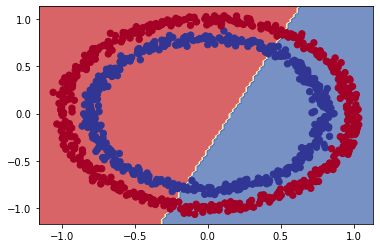

doing binary classifcation...


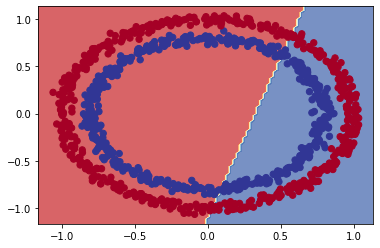

In [56]:
plot_frontiere_decision(modele_4, X, y)

La frontière est toujours linéaire.

Vous aurez compris que nos données étant non-linéaires (les points de notre jeu de données forment 2 cercles), il faut que l'on puisse ajouter de la non-linéarité à notre modèle pour espérer améliorer nos résultats.

Testons cette fois-ci la fonction d'activation `relu` (pour rectified linear unit), toujours sur la première couche :

doing binary classifcation...


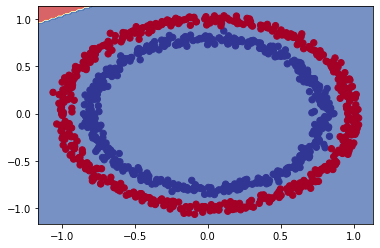

In [59]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
# 2 couches dense d'un neurone chacune
#choix de la fonction d'activation ReLU pour la première couche (hidden layer), la deuxième couche correspond à la couche de sortie (output layer)
modele_5 = tf.keras.Sequential([tf.keras.layers.Dense(1, activation='relu'), tf.keras.layers.Dense(1)])

# 2. Compilation du modèle
# fonction coût : entropie croisée binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_5.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

# 3. Entraînement du modèle sur 100 époques
historique = modele_5.fit(X, y, epochs=100, verbose=0)
plot_frontiere_decision(modele_5, X, y)


doing binary classifcation...


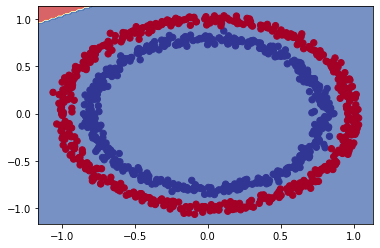

In [63]:
plot_frontiere_decision(modele_5, X, y)

Ne désespérez pas :) ! Même si les résultats sont à nouveau mauvais, cela fait partie de ce que vous expérimenterez également sur vos projets personnels et professionnels !

Encore un essai : nous allons cette fois-ci :
- augmenter le nombre de couches : 2 couches cachées de 4 neurones chacune et 1 couche de sortie comportant 1 neurone
- utiliser la fonction d'activation ReLU pour les 2 couches cachées

In [62]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
# choix de la fonction d'activation ReLU pour les deux premières couches (hidden layers), la troisième couche correspond à la couche de sortie (output layer)
modele_6 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(1)])

# 2. Compilation du modèle
# fonction coût : entropie croisée binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_6.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

# 3. Entraînement du modèle sur 100 époques
historique = modele_6.fit(X, y, epochs=100, verbose=0)

Bon, les résultats sont à nouveau les mêmes, mais visualisons tout de même la frontière de décision pour voir si elle a changé ou non depuis notre dernière visualisation :

doing binary classifcation...


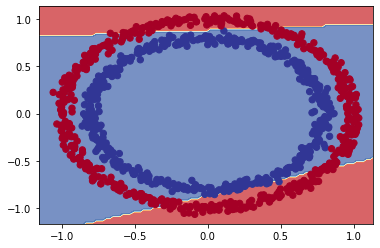

doing binary classifcation...


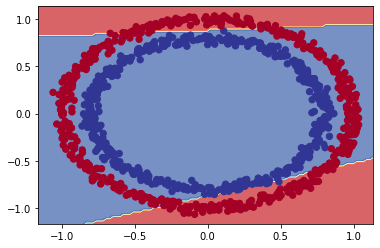

In [64]:
plot_frontiere_decision(modele_6, X, y)

Cette fois-ci, le modèle semblent créer deux lignes droites.

Vous l'aurez compris : l'idée avec les modèles ci-dessus était de vous faire manipuler les réseaux de neurones autour de la création et du choix des valeurs de paramètres.

Cette fois-ci, nous allons (enfin !) modéliser le cercle tant attendu.

Comment ? En spécifiant la fonction d'activation pour la couche de sortie également. Comme indiqué sur le tableau de la partie 1., nous allons choisir la fonction d'activation sigmoïde (pour le reste, nous conservons les mêmes paramètres que le modèle précédent `modele_6`) :

In [65]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
modele_7 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(1, activation="sigmoid")])

# 2. Compilation du modèle
# fonction coût : entropie croisée binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_7.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

# 3. Entraînement du modèle sur 100 époques
historique = modele_7.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluation du modèle
modele_7.

32/32 [==============================] - 0s 337us/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

In [67]:
modele_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Il semble que notre modèle ait atteint de très bons résultats (98% d'exactitude) !

Visualisons la frontière de décision ; au vu des résultats, on peut penser que la frontière correspondra bien au cercle permettant de séparer les points des deux cercles concentriques :

doing binary classifcation...


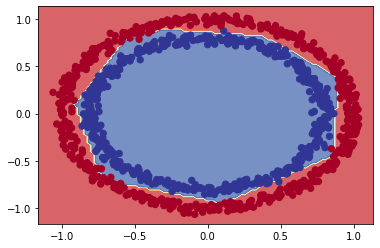

In [68]:
plot_frontiere_decision(modele_7, X, y)

C'est à peu près le cas. Notre modèle semble séparer presque parfaitement nos données (à part pour quelques points).

Cependant, voici une question très importante à laquelle nous allons répondre dans la partie qui suit : qu'est-ce qui ne va pas avec les évaluations et les prédictions que nous avons faites ? Est-ce que nous avons évalué nos modèles correctement ?

Un indice pour ceux qui n'auraient pas encore la réponse : quelles données ont permis d'entraîner le modèle ? Avec quelles données avons-nous fait nos prédictions ?

## 6. Evaluation et amélioration de notre modèle de classification

### 6.1. Partage des données en un jeu d'entraînement et un jeu de test

Vous avez probablement trouvé ce qui n'allait pas : nous avons jusqu'ici évalué nos modèles avec les mêmes données utilisées pour l'entraînement !

Une meilleure approche est de partager notre jeu de données en un jeu d'entraînement, un jeu de validation (optionnel) et un jeu de test.

Pour la suite, nous allons nous contenter de partager notre jeu de données en un jeu d'entraînement et un jeu de test.

Ainsi, nous entraînerons nos modèles sur le jeu d'entraînement et nous verrons ensuite comment le modèle performe (c'est-à-dire voir comment sont les prédictions faites par le modèle) sur le jeu de test.

Procédons au partage des données `X` et `y`:

In [ ]:
# Jeu d'entraînement
#
X_train, y_train = ,  # nous allons réserver 80% des données pour le jeu d'entraînement

# Jeu de test
X_test, y_test = ,  # nous allons réserver 20% des données pour le jeu de test

train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification de la forme des données
 ,

((800, 2), (200, 2))

In [73]:
from sklearn.model_selection import train_test_split
# Jeu d'entraînement
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification de la forme des données
X_train.shape, X_test.shape

((800, 2), (200, 2))

Parfait.

Maintenant que nous avons nos jeux d'entraînement et de test, nous pouvons entraîner le modèle sur le jeu d'entraînement et ensuite l'évaluer sur le jeu de test.

Nous allons garder le même modèle que le précédent `modele_7` :
- en spécifiant le taux d'apprentissage à 0.01 pour l'optimizer Adam (par défaut, il est égal à 0.001)
- en diminuant le nombre d'époques à 25

In [74]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
modele_8 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(1, activation="sigmoid")])

# 2. Compilation du modèle
# fonction coût : entropie croisée binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_8.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])

# 3. Entraînement du modèle sur 25 époques
historique = modele_8.fit(X, y, epochs=25, verbose=0)



In [ ]:
# Evaluation de notre modèle sur le jeu de test
perte, exactitude = modele_8.
print(f"Perte du modèle sur le jeu de test: {perte}")
print(f"Exactitude du modèle sur le jeu de test: {100*exactitude:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000
Perte du modèle sur le jeu de test: 0.12468847632408142
Exactitude du modèle sur le jeu de test: 100.00%


In [76]:
perte, exactitude = modele_8.evaluate(X_test, y_test)
print(f"Perte du modèle sur le jeu de test: {perte}")
print(f"Exactitude du modèle sur le jeu de test: {100*exactitude:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9850
Perte du modèle sur le jeu de test: 0.1417662650346756
Exactitude du modèle sur le jeu de test: 98.50%


100% d'exactitude !

Quelques remarques :
- le paramètre `activation` : dans TensorFlow, on peut utiliser par exemple `relu` ou `sigmoid` au lieu des chemins des bibliothèques (par exemple `tf.keras.activations.relu`)
- le taux d'apprentissage `lr` : nous avons augmenté la valeur de ce paramètre dans l'[optimiseur Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) de 0.001 à 0.01
    - vous pouvez voir le taux d'apprentissage comme la vitesse à laquelle le modèle apprend : plus le taux est grand, plus le modèle apprend vite
    - cependant, avec un taux d'apprentissage **trop grand**, le modèle essaie d'apprendre trop vite et n'apprend finalement rien
- le nombre d'époques : nous l'avons diminué de 100 à 25 mais notre modèle a tout de même conservé de très bons résultats à la fois lors de l'entraînement mais également lorsque nous l'avons évalué sur le jeu de test
    - une des raisons de la bonne performance de notre modèle même avec un nombre d'époques plus faible est que nous avons dans le même temps augmenter le taux d'apprentissage
    - faites le test : garder le nombre d'époques à 25 et spécifier le taux d'apprentissage à 0.001 (la valeur par défaut pour l'optimiseur Adam) et vous verrez que les résultats seront beaucoup moins bons

Nous savons que notre modèle `modele_8` donnent d'excellents résultats grâce à notre métrique d'évaluation (l'exactitude ou *accuracy* en anglais) mais regardons visuellement comment cela se traduit :

doing binary classifcation...
doing binary classifcation...


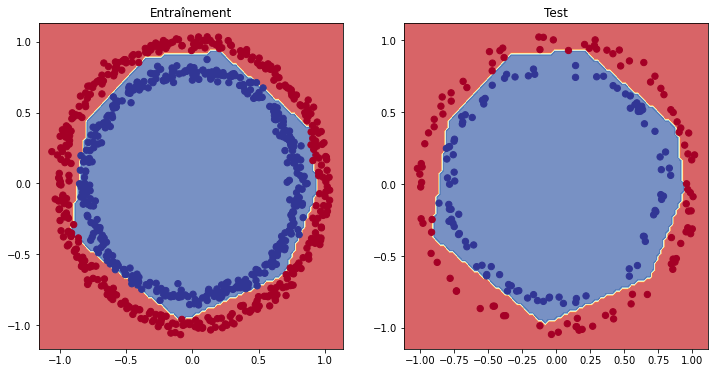

In [ ]:
# Tracer les frontières de décision pour le jeu d'entraînement et le jeu de test
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entraînement")
plot_frontiere_decision(, , )
plt.subplot(1, 2, 2)
plt.title("Test")
plot_frontiere_decision(, , )
plt.show()

doing binary classifcation...
doing binary classifcation...


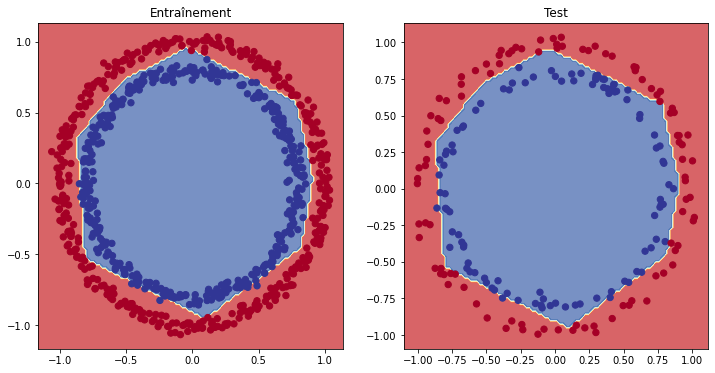

In [77]:
# Tracer les frontières de décision pour le jeu d'entraînement et le jeu de test
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entraînement")
plot_frontiere_decision(modele_8, X_train, y_train )
plt.subplot(1, 2, 2)
plt.title("Test")
plot_frontiere_decision(modele_8,X_test , y_test )
plt.show()

Notre modèle est capable de prédire presque parfaitement l'appartenance des points (rouges ou bleus).

### 6.2. Courbes d'apprentissage

Nous pouvons également tracer les courbes d'apprentissages (parfois également appelées *loss curves* ou courbes de pertes) pour voir comment notre modèle évolue pendant l'entraînement.

Nous allons (enfin !) utiliser la variable `historique`: nous allons faire appel au paramètre `history`, puis nous allons enregistrer les données dans un `Dataframe` et faire appel à la méthode `plot()` du DataFrame :

In [ ]:
# Accès à l'historique (pertes, exactitude) du modèle pour chaque époque lors de l'entraînement


,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


In [82]:
df = pd.DataFrame({'loss': historique.history['loss'], 'accuracy': historique.history['accuracy']})
df

,loss,accuracy
0,0.683428,0.555
1,0.676111,0.563
2,0.669990,0.560
3,0.661518,0.596
4,0.655262,0.585
5,0.638609,0.636
6,0.614991,0.689
7,0.564100,0.748
8,0.510077,0.809
9,0.445113,0.855


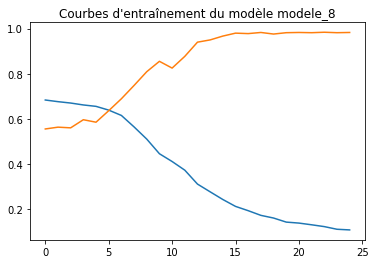

In [84]:
# Visualisation des courbes

plt.title("Courbes d'entraînement du modèle modele_8");
plt.plot(df)

C'est le tracé idéal qui est recherché lorsque l'on traite un problème de classification, les pertes diminuant et l'exactitude augmentant au fur et à mesure de l'entraînement.

### 6.3. Trouver le bon taux d'apprentissage

En dehors du choix de l'architecture en elle-même (les couches, le nombre de neurones, le choix de la fonction d'activation, etc ...), l'hyperparamètre le plus important sur lequel vous pouvez jouer lorsque vous ajustez votre réseau de neurones est le taux d'apprentissage (*learning rate*).

Dans `modele_8`, nous avons augmenté le taux d'apprentissage de l'optimiseur Adam à 0.01 (sur les modèles précédents, nous n'avions pas spécifié le paramètre `lr`; la valeur par défaut de 0.001 était donc celle qui était prise en compte).

Certains se demandent peut-être pourquoi ce choix d'augmenter le taux d'apprentissage.

C'était en fait un simple essai, qui s'est révélé bon.

Avec le temps, vous apprendrez à voir quel genre de modification sur tel ou tel hyperparamètre fonctionne ou non.

Revenons concrètement au taux d'apprentissage.

Voici une astuce pour trouver le taux d'apprentissage optimal (au moins pour commencer l'entraînement des modèles) :
- un learning rate callback
- vous pouvez voir ce "rappel" comme une fonctionnalité que vous pouvez choisir d'ajouter lors de l'entraînement de votre modèle
- nous allons spécifié une plage de valeur pour le taux d'apprentissage et celui-ci va être augmenté au fur et à mesure de l'entraînement

Nous allons donc reprendre notre meilleur modèle jusqu'ici, `modele_8` auquel nous allons implémenter cette fonctionnalité :

In [ ]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
modele_9 = 

# 2. Compilation du modèle
# on ne spécifie plus de valeur pour le paramètre lr ici
modele_9.

# 3. Création du scheduler du taux d'apprentissage
# Utilisation du module LearningRateScheduler de keras.callback
# le taux d'apprentissage prendra des valeurs à partir de 1e-4, en augmentant de 10**(epoch/20) à chaque époque
lr_scheduler = 

# 4. Entraînement du modèle sur 100 époques
historique = modele_9.

Epoch 1/100
25/25 [==============================] - 0s 589us/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 527us/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 480us/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 520us/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 480us/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 480us/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 480us/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 480us/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 560us/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 440us/step - loss: 0.6871 - accura

In [ ]:
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
modele_9 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(1, activation="sigmoid")])

# 2. Compilation du modèle
modele_9.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])


# 3. Création du scheduler du taux d'apprentissage
# Utilisation du module LearningRateScheduler de keras.callback
# le taux d'apprentissage prendra des valeurs à partir de 1e-4, en augmentant de 10**(epoch/20) à chaque époque
lr_scheduler = 

# 4. Entraînement du modèle sur 100 époques
historique = modele_9.fit(X, y, epochs=100, verbose=0)

L'entraînement de notre modèle étant terminé, regardons l'historique d'entraînement (comme nous l'avons fait avec le modèle `modele_8`) :

Text(0.5, 1.0, "Courbes d'entraînement du modèle modele_9")

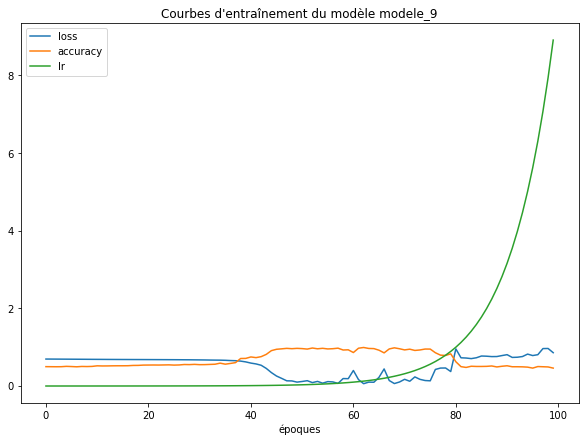

In [ ]:

plt.title("Courbes d'entraînement du modèle modele_9")

Comme vous pouvez le voir, le taux d'apprentissage augmente exponentiellement en fonction du nombre d'époques.

On peut également constater que l'exactitude de notre modèle augmente (et l'erreur diminue) à un point donné, lorsque le taux d'apprentissage comment à légèrement augmenter (entre les époques 30 et 40).

Pour connaîter avec plus de précision où se trouve ce point d'inflexion, nous pouvons tracer les pertes en fonction du taux d'apprentissage sur une échelle log (en utilisant par exemple `plt.semilogx()`) :

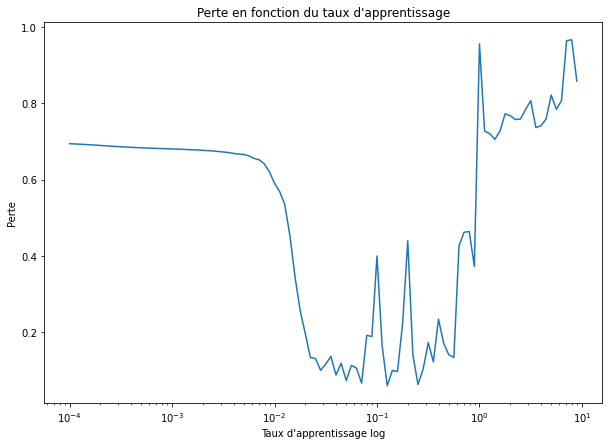

In [ ]:
# on définit notre plage de valeur pour le taux d'apprentissage
lrs = 1e-4 * (10 ** (np.arange(100)/20))

plt.figure(figsize=(10, 7))

# on passe le taux d'apprentissage en échelle logarithmique (en abscisse) avec la fonction plt.semilogx()
# perte en ordonnée

plt.xlabel("Taux d'apprentissage log")
plt.ylabel("Perte")
plt.title("Perte en fonction du taux d'apprentissage");

La règle empirique pour trouver la valeur idéale du taux d'apprentissage (au moins la valeur idéale pour commencer l'entraînement de notre modèle) est de prendre la valeur du taux d'apprentissage où les pertes continuent toujours de diminuer mais qu'elles n'ont toujours pas atteint le minimum.

Dans notre cas, notre taux d'apprentissage ideal se situe entre `0.01` ($10^{-2}$) et `0.02`.

Nous pouvons maintenant créer un nouveau modèle (en repartant du modèle `modele_8` avec un entraînement sur 20 époques) en fixant le taux d'apprentissage `lr` à `0.02` :

In [ ]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
modele_10 = 

# 2. Compilation du modèle
# fonction coût : entropie croisée binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_10.

# 3. Entraînement du modèle sur 20 époques
historique = 

Epoch 1/20
25/25 [==============================] - 0s 922us/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 480us/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 479us/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 520us/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 440us/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 480us/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 480us/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 520us/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 469us/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 569us/step - loss: 0.2512 - accuracy: 0.9500

Avec un taux d'apprentissage un peu plus élevé (`0.02` au lieu de `0.01`), nous avons une exactitude plus élevée que `modele_8` en moins d'époques (`20` au lieu de `25`).

Evaluons ce modèle sur le jeu de test :

7/7 [==============================] - 0s 662us/step - loss: 0.0574 - accuracy: 0.9900


[0.05740182474255562, 0.9900000095367432]

Traçons les prédictions, toujours à l'aide de la fonction `plot_frontiere_decision()` :

doing binary classifcation...
doing binary classifcation...


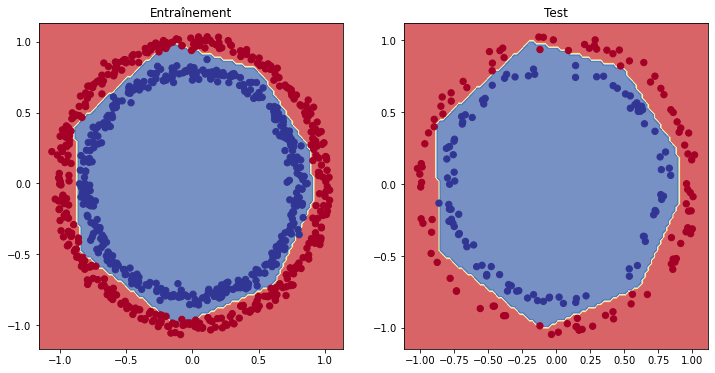

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entraînement")
plot_frontiere_decision(, , )
plt.subplot(1, 2, 2)
plt.title("Test")
plot_frontiere_decision(, , )
plt.show()

Nous avons la confirmation visuelle que notre modèle se comporte quasiment parfaitement.

**Remarque :**
- si ce modèle devait être utilisé en environnement de production, il faudrait s'assurer qu'il se généralise bien (en mettant par exemple des outils de monitoring)

### 6.4. D'autres méthodes d'évaluation pour la classification

En dehors des visualisations que nous faisons, il y a beaucoup de métriques différentes que nous pouvons utiliser pour la classification.

En voici quelques unes des plus courantes :

| **Métrique/méthode d'évaluation** | **Défintion** | **Code (lien)** |
| --- | --- | --- |
| Exactitude | Sur 100 prédictions, combien de fois le modèle donne la bonne prédiction ? Par exemple 95% d'exactitude signifie que le modèle fait 95/100 prédictions correctes. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Précision | Proportion des vrais positifs par rapport au nombre total d'observations. Une plus grande précision signifie moins de faux positifs (le modèle prédit 1 lorsqu'il aurait fallu prédire 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Rappel | Proportion des vrais positifs par rapport au nombre total de vrais prositifs et de faux positifs. Un rappel plus grand signifie moins de faux négatifs (le modèle prédit 0 lorsqu'il aurait fallu prédire 1). | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| Score F1 | Combinaison de la précision et du rappel dans une seule métrique, 1 étant le meilleur score et 0 le plus mauvais. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Matrice de confustion](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Comparaison des valeurs prédites par rapport aux vraies valeurs, sous forme de tableau ; si 100% correct, toutes les valeurs de la matrice formeront une diagonale. | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Rapport de métriques | Rapport texte des principales métriques pour la classification, telles que la précision, le rappel et le score F1. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

## 7. Classification multi-classes

### 7.1. Modélisation

Nous allons aborder un exemple de classification multi-classes dans cette partie.

Nous allons cette fois-ci directement charger un jeu de données disponible dans le module `datasets` de Keras.

C'est un jeu de données déjà pré-traités (données numériques) créé par [Zalando](https://github.com/zalandoresearch/fashion-mnist) .

Notre objectif avec ce dataset va être de créer un modèle capable de prédire si un vêtement est une chaussure, un T-shirt, une veste, etc ...

En plus d'être pré-traitées, les données ont déjà été partagées en un jeu d'entraînement et un jeu de test pour nous ; nous n'avons plus qu'à les charger à l'aide de la fonction `fashion_mnist.load_data()` :

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

Regardons à quoi ressemblent les données, par exemple pour la première observation :

In [ ]:
print(f"Observation d'entraînement:\n{train_data[0]}\n") 
print(f"Label: {train_labels[0]}")

Observation d'entraînement:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   

Cela nous fait une grande liste de nombres pour notre observation.

L'étiquette est représentée par un nombre unique.

Qu'en est-il de la forme des données d'entraînement et de test ?

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Si nous prenons une observation donnée, qu'en est-il de sa forme ?

In [ ]:
, 

((28, 28), ())

Nous avons donc :
- 60 000 observations d'entraînement
- 10 000 observations pour le jeu de test
- chacune de ces observations étant de dimension 28*28
- chaque observation étant étiquettée par un nombre (l'étiquette)

Chaque observation représente finalement l'image d'un vêtement : cette image a été transformée sour forme numérique (une matrice 28*28 de nombres, chaque nombre représentant un pixel de l'image d'origine).

Visualisons une des observations à l'aide de la fonction `pyplot` de Matplotlib :

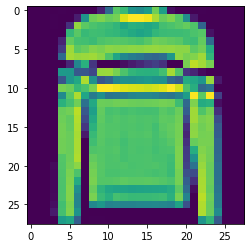

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[5]);

Voici l'étiquette associée à cette image :

2

Comme dit plus haut, ces données sont sous forme numérique, ce qui est parfait pour un réseau de neurones.

Mais il serait plus pratique, pour nous humains (😊 !) d'avoir le nom associée à la classe (chaussure, robe, veste, ect...).

Cette liste est justement donnée sur [la page GitHub du dataset](https://github.com/zalandoresearch/fashion-mnist#labels).

Nous allons recréer cette liste :

In [ ]:
noms_etiquettes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Nous avons donc 10 classes au total.

Nous allons construire un réseau de neurones capable de trouver les relations entre les valeurs de pixels et l'étiquette associée :
- puisque nous avons des données d'entrée de forme 28x28, nous allons "aplanir" les données dans un tenseur de forme (784)
    - nous allons ainsi devoir spécifier une nouvelle couche, la couche d'entrée (*input layer*)
    - on utilisera pour ceci la fonction `tf.keras.layers.Flatten()` en y spécifiant le paramètre `input_shape=(28,28)`
- la forme des données de sortie sera 10, notre modèle devant prédire 10 classes différentes
    - il nous faudra donc modifier le nombre de neurones de la couche de sortie à 10
- nous allons cette fois-ci faire le choix de la fonction d'activation `softmax` (au lieu de `sigmoid`) pour la couche de sortie
    - cette fonction d'activation est adaptée à la classification multi-classes
- nous devons changer notre fonction de perte : nous allons utiliser la fonction [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)
- lors de l'entraînement, nous allons utiliser un nouvel hyperparamètre, `validation_data`
    - ce paramètre va nous donner une idée de la façon dont le modèle performe sur le jeu de test pendant l'entraînement

Entraînons ce modèle sur le jeu d'entraînement (nous garderons les même couches cachées que précédemment) :

In [ ]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
fashion_1 = 

# 2. Compilation du modèle
# optimizer : Adam (garder le taux d'apprentissage par défaut)
# metrique de performance : l'exactitude (accuracy)
fashion_1.

# 3. Entraînement du modèle sur 10 époques
# paramètre validation_data à spécifier
historique = 

Epoch 1/10
1875/1875 [==============================] - 1s 669us/step - loss: 2.1637 - accuracy: 0.1620 - val_loss: 1.7923 - val_accuracy: 0.2180
Epoch 2/10
1875/1875 [==============================] - 1s 626us/step - loss: 1.7032 - accuracy: 0.2549 - val_loss: 1.6518 - val_accuracy: 0.2843
Epoch 3/10
1875/1875 [==============================] - 1s 626us/step - loss: 1.6346 - accuracy: 0.2830 - val_loss: 1.6242 - val_accuracy: 0.2824
Epoch 4/10
1875/1875 [==============================] - 1s 667us/step - loss: 1.6107 - accuracy: 0.2853 - val_loss: 1.6089 - val_accuracy: 0.2885
Epoch 5/10
1875/1875 [==============================] - 1s 671us/step - loss: 1.5959 - accuracy: 0.3069 - val_loss: 1.5744 - val_accuracy: 0.3328
Epoch 6/10
1875/1875 [==============================] - 1s 632us/step - loss: 1.5901 - accuracy: 0.3089 - val_loss: 1.5717 - val_accuracy: 0.3059
Epoch 7/10
1875/1875 [==============================] - 1s 648us/step - loss: 1.5815 - accuracy: 0.3167 - val_loss: 1.5631 -

In [ ]:
fashion_1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_27 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Notre modèle obtient donc environ 33% d'exactitude après 10 époques, en utilisant un modèle similaire à ceux utilisés pour notre problème de classification binaire précédent.

Ce qui est mieux que de devoir deviner (deviner reviendrait à 10% d'exactitude avec 10 classes) mais nous pouvons assurément faire mieux.

### 7.2. Transformation min-max

Les réseaux de neurones préfèrent les nombres compris entre 0 et 1.

Vérifions la plage de valeurs de nos données :

In [ ]:
# Vérifier les valeurs min et max de nos données d'entraînement et de test
, , , , 

(0, 255, 0, 255)

Nous pouvons transformer nos données et les ramener à une plage entre 0 et 1 en les divisant par le maximum qui est `255.0` : c'est ce que l'on appelle la **transformation min-max** (appelée en anglais *min-max scaling* ou parfois *normalization*).

In [ ]:
# Division des jeux d'entraînement et de test par leur valeur maximale
train_data = 
test_data = 

# Vérifer à nouveau les valeurs min et max de nos données d'entraînement
, 

(0.0, 1.0)

Entraînons à nouveau le même modele que précédemment avec ces nouvelles données transformées :

In [ ]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
fashion_2 = 

# 2. Compilation du modèle
# optimizer : Adam (garder le taux d'apprentissage par défaut)
# metrique de performance : l'exactitude (accuracy)


# 3. Entraînement du modèle sur 10 époques
historique_transf = 

Epoch 1/10
1875/1875 [==============================] - 1s 668us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 1s 644us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 1s 636us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 1s 636us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

Impressionnant ! Une simple transformation min-max nous a permis de plus que doubler notre exactitude (80%) !

Traçons graphiquement les courbes d'entraînement de nos 2 modèles (même méthode que pour la classification binaire : passage des données sous forme de DataFrame puis utilisation de la méthode plot() du dataFrame) :

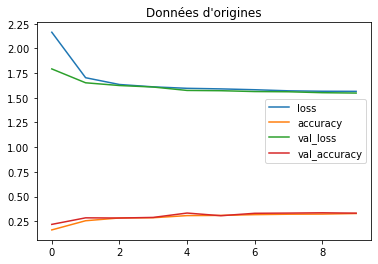

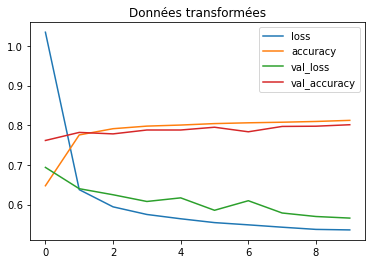

Nous pouvons voir ici comment notre modèle avec les données transformées a pu apprendre beaucoup plus rapidement (avec déjà une exactitude beaucoup plus élevée dès la première époque).

### 7.3. Taux d'apprentissage idéal

Nous allons maintenant essayer de trouver le taux d'apprentissage idéal, en employant la même méthode que pour la classification binaire :

In [ ]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
fashion_3 = 

# 2. Compilation du modèle
# optimizer : Adam (ne pas spécifier le taux d'apprentissage)
# metrique de performance : l'exactitude (accuracy)


# 3. Création du scheduler du taux d'apprentissage
# le taux d'apprentissage prendra des valeurs à partir de 1e-3, en augmentant de 10**(epoch/20) à chaque époque
lr_scheduler = 

# 4. Entraînement du modèle sur 40 époques
# le modèle précédent donnant déjà des résultats corrects, nous n'aurons probablement pas besoin de 100 époques, d'où le choix de 40 époques ici
historique_transf_lr = 

Epoch 1/40
1875/1875 [==============================] - 1s 750us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 1s 719us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 1s 690us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 1s 675us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 1s 673us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 1s 669us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 1s 671us/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 -

Traçons le résultat (idem que pour la classification binaire) :

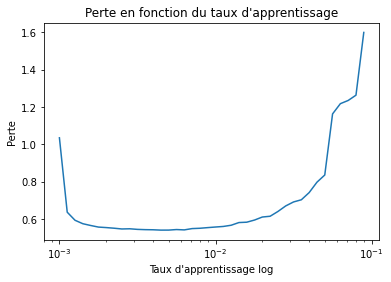

In [ ]:
lrs = 1e-3 * (10**(np.arange(40)/20))

plt.xlabel("Taux d'apprentissage log")
plt.ylabel("Perte")
plt.title("Perte en fonction du taux d'apprentissage");

Ici, la valeur idéale se situe quelque part proche du taux d'apprentissage par défaut de l'optimiseur Adam (`0.001`).

Entraînons un nouveau modèle en utilisant cette valeur :

In [ ]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# 1. Création d'un modèle en utilisant l'API séquentielle
fashion_4 = 

# 2. Compilation du modèle
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)


# 3. Entraînement du modèle sur 20 époques
historique_transf = 

Epoch 1/20
1875/1875 [==============================] - 1s 704us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 1s 671us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 1s 641us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 1s 644us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 1s 651us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 1s 654us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 1s 694us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

Maintenant que nous avons un modèle entraîné avec un taux d'entraînement proche de celui idéal et qui performe plutôt bien, nous pourrions :
- évaluer ses performances en utilisant d'autres métriques pour la classification
- afficher ses prédictions
- améliorer son exactitude (par exemple en l'entaînant plus longtemps ou en changeant son architecture)
- le sauvegarder et l'exporter pour l'utiliser dans une application

Ici, nous allons nous limiter aux deux premiers points.

### 7.4. Matrice de confusion

Commençons par faire nos prédictions sur le jeu de test en utilisant la méthode `predict()` de notre meilleur modèle `fashion_4` :

In [ ]:
y_proba = 

# Afficher les prédictions de quelques observations (les 5 premières par exemple)


array([[8.56298019e-11, 3.53616252e-13, 2.66337756e-05, 4.63561953e-08,
        5.09497040e-05, 9.61193666e-02, 8.17781896e-08, 9.18689221e-02,
        4.06052731e-03, 8.07873547e-01],
       [3.42785211e-06, 1.28992159e-16, 9.59891498e-01, 2.05163147e-07,
        1.53291877e-02, 2.45323401e-13, 2.41428781e-02, 1.13834485e-28,
        6.32722571e-04, 4.47892141e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38671428e-08, 3.34058655e-03,
        1.32495097e-05, 1.43834339e-21, 8.27906115e-06, 7.32382985e-18,
        5.48116041e-08, 4.92254248e-14],
       [7.50313629e-05, 9.90536869e-01, 4.25286942e-07, 9.22316313e-03,
        1.36231683e-04, 1.82763695e-18, 2.68082422e-05, 4.81250172e-14,
        1.45215347e-06, 2.22115451e-11],
       [7.21898302e-02, 1.54957206e-06, 2.55669117e-01, 1.03631085e-02,
        4.35413457e-02, 1.10694494e-13, 6.16930127e-01, 6.75444038e-23,
        1.30491669e-03, 1.21403809e-09]], dtype=float32)

Nous pouvons voir que la méthode `predict()` nous renvoie les probabilités de prédiction, c'est-à-dire les probabilités d'appartenance aux classes (donc 10 probabilités par observation, avec la somme égale à 100%).

Ainsi, pour la première observation, la probabilité la plus forte est celle de l'étiquette 9 (80,8 %) : c'est donc cette classe que notre modèle prédira pour cette observation.

Nous pouvons trouver la classe de la probabilité la plus grande en utilisant la méthode `argmax()` :

In [ ]:
# Classe de la plus grande probabilité, nom de la classe (par exemple pour la première observation)
, 

(9, 'Ankle boot')

Faisons maintenant cela pour l'ensemble des prédictions :

In [ ]:
# Vecteur contenant la classe de la plus grande probabilité pour chaque observation (en utilisant la méthode argmax() par exemple)
y_preds = 

# Résultat pour les 10 premières observations


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

Parfait.

Maintenant que nous avons nos prédictions sous forme d'étiquettes, nous allons créer la matrice de confusion pour les comparer aux vrais étiquettes :

In [ ]:
# Création de la matrice de confusion à l'aide du module confusion_matrix de sklearn

from sklearn.metrics import confusion_matrix
matrice_confusion = 
matrice_confusion

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

Il est souvent plus pratique d'examiner une représentation graphique de la matrice de confusion, obtenue grâce à la fonction `matshow()` de Matplotlib :

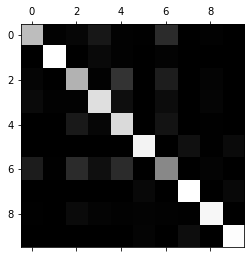

In [ ]:
plt.matshow(matrice_confusion, cmap=plt.cm.gray)
plt.show()

Si vous préférez une représentation graphique colorée :

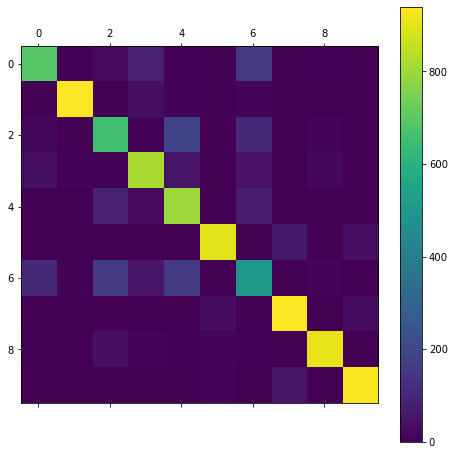

In [ ]:
def plot_matrice_confusion(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plot_matrice_confusion(matrice_confusion)

Voici une implémentation un peu plus complexe mais qui permet d'afficher les probabilités d'appartenance :

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

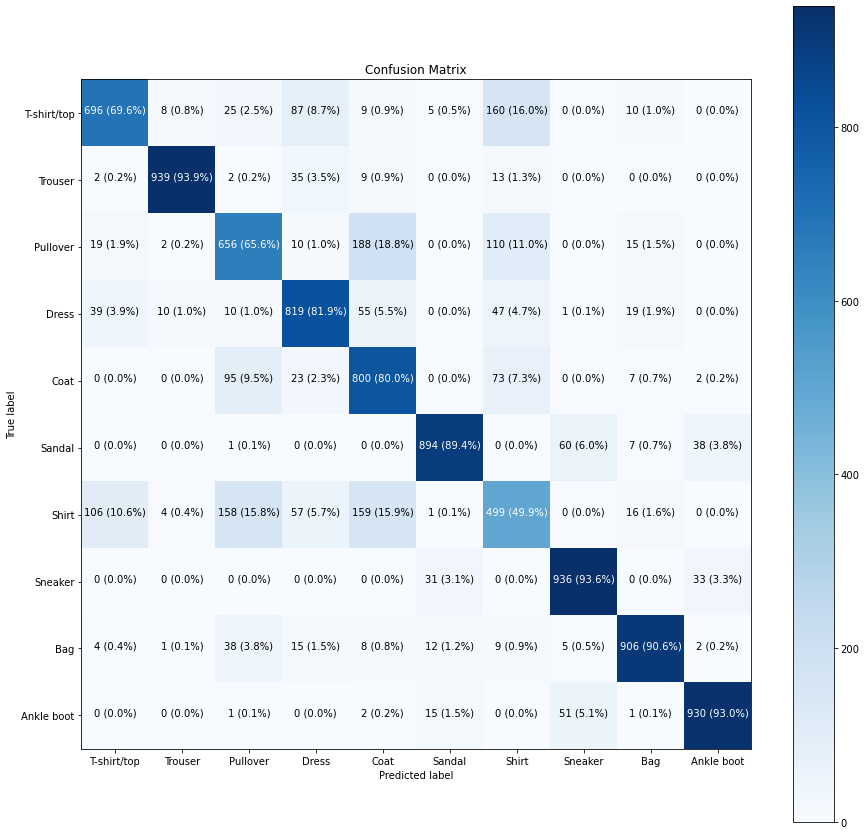

In [ ]:
make_confusion_matrix(y_true=test_labels, y_pred=y_preds,classes=noms_etiquettes,figsize=(15, 15),text_size=10)

L'affichage est plus intéressant ici.

Nous pouvons voir que les résultats ne sont pas aussi bons qu'ils pourraient : par exemple, notre modèle confond les classes `shirt` et `T-shirt/top` (il prédit la classe `Shirt` alors que la vraie étiquette correspond à la classe `T-shirt/top`).

### 7.5. Visualisation des prédictions

Voici une fonction qui sélectionnera aléatoirement une observation dans notre jeu (une image) et qui l'affichera avec la prédiction du modèle choisi :

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

Regardons le résultat :

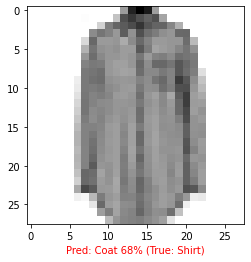

In [ ]:
plot_random_image(model=fashion_4, images=test_data, true_labels=test_labels, classes=noms_etiquettes)

Après avoir lancé plusieurs fois la cellule ci-dessus, vous commencerez à avoir une compréhension visuelle de la relation entre les prédictions du modèle et les vraies étiquettes.

Globalement, il semblerait que notre modèle mélange les classes qui sont similaires (comme par exemple `Sneaker` et `Ankle boot`).

Un des axes d'amélioration possibles serait de corriger ce problème.